#  Objective
Train and fine-tune a Decision  Tree for the make moons dataset.<br> Goal Accuracy: 85%

First we will generate a dataset using Scikit-Learn's **make_moons()**. This allows us to create a toy dataset which is great for visualizing clustering and classification algorithms. With this in mind, after we create the data, let's plot it.

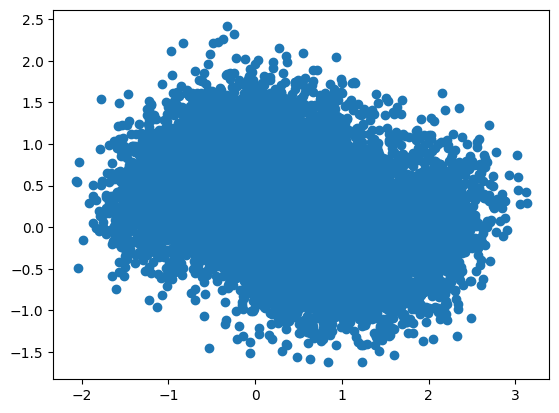

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

moons_data = make_moons(n_samples=10000, noise = 0.4)

plt.scatter(moons_data[0][:,0], moons_data[0][:,1])
plt.show()

This scatter plot doesnt give us a lot of information about the data, accept maybe we can learn something about its distribution. Let's plot the two different classes in different colors and turn down there opacity:

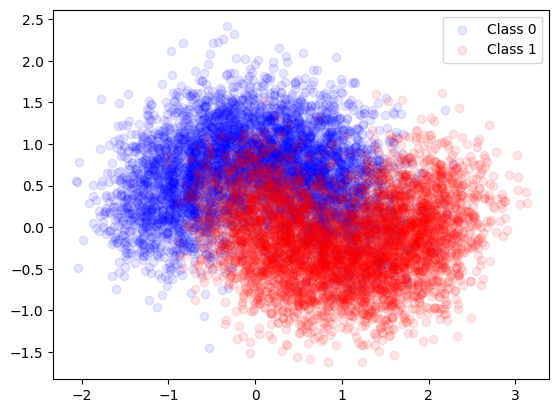

In [2]:
import numpy as np

moons_c0 = []
moons_c1 = []

for pt in range(len(moons_data[0])):
    if moons_data[1][pt] == 0:
        moons_c0.append(moons_data[0][pt])
    else:
        moons_c1.append(moons_data[0][pt])

moons_c0 = np.array(moons_c0)
moons_c1 = np.array(moons_c1)

plt.scatter(moons_c0[:, 0], moons_c0[:, 1], c="blue", alpha=0.1, label="Class 0")
plt.scatter(moons_c1[:, 0], moons_c1[:, 1], c="red", alpha=0.1, label="Class 1")
plt.legend()
plt.show()

We can see two crescent shapes composed by class 0 and 1. These crescents are colliding and there is no line that perfectly seperates the classes. We can imagine that it will likely require a Decision Tree to have many branches before it performs well. This is because the boundary that best seperates this data is a curve, which is not conducive to orthogonally drawn boundaries.

Now let's create our train and test sets, then compose a model. We will use GridSearchCV to test a number of hyperparameters:

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(moons_data[0], moons_data[1], test_size=0.2)

param_grid = [
    {"criterion":["gini", "entropy"], "max_depth":[20, 50, 100, 250]},
    {"criterion":["gini", "entropy"], "max_leaf_nodes":[50, 75, 100, 250, 500]}
]

tree_clf = DecisionTreeClassifier()
grid_search = GridSearchCV(tree_clf, param_grid, cv=3,
                          scoring="accuracy",
                          return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [20, 50, 100, 250]},
                         {'criterion': ['gini', 'entropy'],
                          'max_leaf_nodes': [50, 75, 100, 250, 500]}],
             return_train_score=True, scoring='accuracy')

We can get a list of all the classifiers and their respective accuracies as follows:

In [4]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.8091249471535488 {'criterion': 'gini', 'max_depth': 20}
0.8054997907707149 {'criterion': 'gini', 'max_depth': 50}
0.8073746970675927 {'criterion': 'gini', 'max_depth': 100}
0.8074994939210992 {'criterion': 'gini', 'max_depth': 250}
0.8160005880735275 {'criterion': 'entropy', 'max_depth': 20}
0.8056250564328371 {'criterion': 'entropy', 'max_depth': 50}
0.8063752439797239 {'criterion': 'entropy', 'max_depth': 100}
0.8062503064836325 {'criterion': 'entropy', 'max_depth': 250}
0.8602494174349736 {'criterion': 'gini', 'max_leaf_nodes': 50}
0.8539996828978523 {'criterion': 'gini', 'max_leaf_nodes': 75}
0.8518742921575914 {'criterion': 'gini', 'max_leaf_nodes': 100}
0.8419998700462518 {'criterion': 'gini', 'max_leaf_nodes': 250}
0.825999338229758 {'criterion': 'gini', 'max_leaf_nodes': 500}
0.8581244486224668 {'criterion': 'entropy', 'max_leaf_nodes': 50}
0.854499057835325 {'criterion': 'entropy', 'max_leaf_nodes': 75}
0.8519988546067901 {'criterion': 'entropy', 'max_leaf_nodes': 100}
0.838

We have already reached our goal, scoring higher than 86 percent on a three-fold cross-validation. Suprisingly, the  model which performed best was the one that used the least number of leaf nodes- *which in our case was 50*. Let's try tto improve our score a little bit by testing other values for leaf nodes, close to 50.

In [5]:
param_grid = [
    {"criterion":["gini", "entropy"], "max_leaf_nodes":[10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]}
]

grid_search = GridSearchCV(tree_clf, param_grid, cv=3,
                          scoring="accuracy",
                          return_train_score=True)
grid_search.fit(X_train, y_train)

cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.8533748547748111 {'criterion': 'gini', 'max_leaf_nodes': 10}
0.8584992611107407 {'criterion': 'gini', 'max_leaf_nodes': 15}
0.861999198712314 {'criterion': 'gini', 'max_leaf_nodes': 20}
0.8604994799506026 {'criterion': 'gini', 'max_leaf_nodes': 25}
0.861749464362716 {'criterion': 'gini', 'max_leaf_nodes': 30}
0.8611246831205364 {'criterion': 'gini', 'max_leaf_nodes': 35}
0.8614995893705335 {'criterion': 'gini', 'max_leaf_nodes': 40}
0.8594996518158412 {'criterion': 'gini', 'max_leaf_nodes': 45}
0.8602494174349736 {'criterion': 'gini', 'max_leaf_nodes': 50}
0.8592493548959044 {'criterion': 'gini', 'max_leaf_nodes': 55}
0.8579996048880987 {'criterion': 'gini', 'max_leaf_nodes': 60}
0.8562497298490351 {'criterion': 'gini', 'max_leaf_nodes': 65}
0.8548748079408304 {'criterion': 'gini', 'max_leaf_nodes': 70}
0.8536248235287168 {'criterion': 'entropy', 'max_leaf_nodes': 10}
0.8542495110091735 {'criterion': 'entropy', 'max_leaf_nodes': 15}
0.8572490422943194 {'criterion': 'entropy', 'max_le

We improve slightly, but nothing spectacular. Let's save the best model from this set and see how it performs on the test set.

In [6]:
from sklearn.metrics import accuracy_score
best_tree_clf = grid_search.best_estimator_
y_predicted = best_tree_clf.predict(X_test)

print("Test Accuracy:", accuracy_score(y_predicted, y_test))

Test Accuracy: 0.8575


The test accuracy falls about 1 percent short of the training accuracy, but we met our objective! Now, for good practice, let's display the decision boundary that our Decision Tree Regressor came up with.

Text(0.5, 1.0, 'Best Classifier')

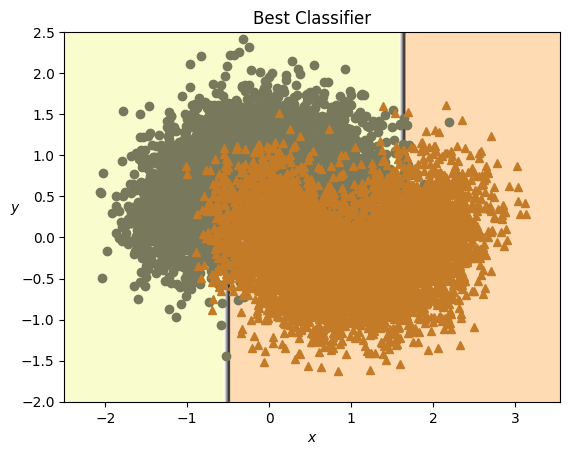

In [21]:
def plot_decision_boundary(clf, X, y, axes, cmap):
    x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                        np.linspace(axes[2], axes[3], 100))
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=cmap)
    plt.contour(x1, x2, y_pred, cmap="Greys", alpha=0.8)
    colors = {"Wistia": ["#78785c", "#c47b27"], "Pastel1": ["red", "blue"]}
    markers = ("o", "^")
    for idx in (0, 1):
        plt.plot(X[:, 0][y == idx], X[:, 1][y == idx],
                 color=colors[cmap][idx], marker=markers[idx], linestyle="none")
    plt.axis(axes)
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$", rotation=0)

plot_decision_boundary(best_tree_clf, moons_data[0], moons_data[1], axes=[-2.5, 3.55, -2, 2.5], cmap="Wistia")
#plt.plot(moons_c0[:, 0], moons_c0[:, 1], "b.", alpha=0.1)
#plt.plot(moons_c1[:, 0], moons_c1[:, 1], "r.", alpha=0.1)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Best Classifier")

This is not a beautiiful depiction of the decision boundary. For this visualization I just followed along with a function from the Authors github. As I do more of these visualizations I'll learn to make them prettier.
# New Objective
Gain atleast a half percent higher accuracy using a Random Forests with the constraint that we must generate 1,000 subsets of the training set, each with 100 instances. Let's begin by creating these subsets:

In [8]:
from sklearn.model_selection import ShuffleSplit

num_trees = 1000  # number of trees in the forest
subset_sz = 100  # size of each individual subset
subsets = []  # will hold our random subsets and their targets

random_subsets = ShuffleSplit(n_splits=num_trees, test_size=num_trees-subset_sz)  # note that the test_size is much larger

for train_index, test_index in random_subsets.split(X_train):
    subset_X = X_train[train_index]
    subset_y = y_train[train_index]
    subsets.append([subset_X, subset_y])

Now the subsets variable has 1,000 elements who each contain two elements. The first element is a list containing the 100 random training instances that subset was provided and the second element is the instances class values. Now let's create a random forest consisting of 1,000 trees and assign each one randomly generated subset.

In [24]:
forest = [DecisionTreeClassifier() for tree in range(num_trees)]  # Creating a list of 1000 DecisionTreeClassifiers

accuracy_scores = []  # list to hold each trees accuracy

# Fit the decision trees on the individual subsets
for tree in range(num_trees):
    forest[tree].fit(subsets[tree][0], subsets[tree][1])
    
    current_tree_predict = forest[tree].predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, current_tree_predict))
    
accuracy = sum(accuracy_scores)/num_trees
print("Forest Accuracy:", accuracy)

Forest Accuracy: 0.8106540000000007


At this point, we have successfully fit 1,000 DecisionTreeClassifiers. Currently each of these Decision Trees are default from Scikit-Learn. The default trees scored an accuracy just above 81 percent. Let's try to improve this by using the best parameters for our decision tree above and compare the results:

In [27]:
from sklearn import clone

forest = [clone(grid_search.best_estimator_) for tree in range(num_trees)]  # Creating a list of 1000 DecisionTreeClassifiers

accuracy_scores = []  # list to hold each trees accuracy

# Fit the decision trees on the individual subsets
for tree in range(num_trees):
    forest[tree].fit(subsets[tree][0], subsets[tree][1])
    
    current_tree_predict = forest[tree].predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, current_tree_predict))
    
accuracy = sum(accuracy_scores)/num_trees
print("Forest Accuracy:", accuracy)

Forest Accuracy: 0.8632029999999986


This performed fairly better than the default trees and slightly better than the lone Decision Tree. It is my belief that with a larger dataset, giving more variation among each subset, we could achieve a much higher accuracy. Also, we could spend more time tweaking hyperparameters if we really wanted to gain another percent in accuracy. But for the purposes of this 